In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Set preferences

In [190]:
conditions = ['Safe Harbor KO', 'RASA2 KO', 'CUL5 KO']
colors = {'Safe Harbor KO': '#a9a9a9', 
          'RASA2 KO': '#800000',
          'CUL5 KO': '#000075'}


In [3]:
SH = ['B3', 'B4', 'B5', 'B6']
RASA2 = ['E3', 'E4', 'E5', 'E6']
CUL5 = ['B7', 'B8', 'B9', 'B10']

## Load list of interactions

In [4]:
lower_lim = 50
upper_lim = 350

In [5]:
interactions = pd.read_csv('./misc-files/unique_interaction_table_2024-09-11_21_23_15_past50.csv')

In [6]:
interactions[['well','tid', 'cid', 'instance']] = interactions['unique_consec_group'].str.split('_', expand = True)

In [7]:
well_dict = {'B3': 'Safe Harbor KO', 
             'B4': 'Safe Harbor KO', 
             'B5': 'Safe Harbor KO', 
             'B6': 'Safe Harbor KO', 
             'B7': 'CUL5 KO', 
             'B8': 'CUL5 KO', 
             'B9': 'CUL5 KO', 
             'B10': 'CUL5 KO', 
             'E3': 'RASA2 KO', 
             'E4': 'RASA2 KO', 
             'E5': 'RASA2 KO', 
             'E6': 'RASA2 KO'}

In [8]:
interactions['KO'] = interactions['well'].map(well_dict)

In [9]:
.25 * interactions['KO'].value_counts()

KO
RASA2 KO          191.50
Safe Harbor KO    182.00
CUL5 KO           166.25
Name: count, dtype: float64

In [10]:
interactions.groupby('KO')['well'].value_counts()

KO              well
CUL5 KO         B10     213
                B7      165
                B9      164
                B8      123
RASA2 KO        E6      241
                E3      185
                E5      177
                E4      163
Safe Harbor KO  B3      268
                B4      184
                B6      152
                B5      124
Name: count, dtype: int64

In [11]:
grouped = interactions.groupby('KO')

## Get number of cells from segmentation

In [19]:
from utils import load_data_local

In [20]:
n_cells = np.zeros((3,4,350))
n_unique = np.zeros((3,4))
n_unique_c = np.zeros((3,4))

In [21]:
def get_cells_over_time(dcl_ob):
    tcells = dcl_ob['y'][0,:,:,0,:]
    ncells = [len(np.unique(tcells[i])) - 1 for i in range(len(tcells))]
    return ncells

In [22]:
for i in range(4):
    sh_ob = load_data_local('/Users/averma/Documents/LiveCellImaging/VanValenCollab/updated_full/cart_' + SH[i] + '_start_0_end_350_nuc_15_cyto_75.zip')
    n_cells[0,i] = get_cells_over_time(sh_ob)
    n_unique[0,i] = len(np.unique(sh_ob['y'][0, lower_lim:upper_lim])) - 1
    
    rasa_ob = load_data_local('/Users/averma/Documents/LiveCellImaging/VanValenCollab/updated_full/cart_' + RASA2[i] + '_start_0_end_350_nuc_15_cyto_75.zip')
    n_cells[1,i] = get_cells_over_time(rasa_ob)
    n_unique[1,i] = len(np.unique(rasa_ob['y'][0, lower_lim:upper_lim])) - 1
    
    cul_ob = load_data_local('/Users/averma/Documents/LiveCellImaging/VanValenCollab/updated_full/cart_' + CUL5[i] + '_start_0_end_350_nuc_15_cyto_75.zip')
    n_cells[2,i] = get_cells_over_time(cul_ob)
    n_unique[2,i] = len(np.unique(cul_ob['y'][0, lower_lim:upper_lim])) - 1

In [23]:
for i in range(4):
    sh_ob = load_data_local('/Users/averma/Documents/LiveCellImaging/VanValenCollab/updated_full/cart_' + SH[i] + '_start_0_end_350_nuc_15_cyto_75.zip')
    n_unique_c[0,i] = len(np.unique(sh_ob['y'][1, lower_lim:upper_lim])) - 1
    
    rasa_ob = load_data_local('/Users/averma/Documents/LiveCellImaging/VanValenCollab/updated_full/cart_' + RASA2[i] + '_start_0_end_350_nuc_15_cyto_75.zip')
    n_unique_c[1,i] = len(np.unique(rasa_ob['y'][1, lower_lim:upper_lim])) - 1
    
    cul_ob = load_data_local('/Users/averma/Documents/LiveCellImaging/VanValenCollab/updated_full/cart_' + CUL5[i] + '_start_0_end_350_nuc_15_cyto_75.zip')
    n_unique_c[2,i] = len(np.unique(cul_ob['y'][1, lower_lim:upper_lim])) - 1

In [24]:
n_ints = np.zeros((3,4))

In [25]:
for i in range(4):
    n_ints[0,i] = len(interactions[interactions['well'] == SH[i]]['t_cell_id'].unique())
    n_ints[1,i] = len(interactions[interactions['well'] == RASA2[i]]['t_cell_id'].unique())
    n_ints[2,i] = len(interactions[interactions['well'] == CUL5[i]]['t_cell_id'].unique())

In [26]:
np.mean(100 * n_ints/n_unique, axis = 1)

array([1.00341919, 0.696014  , 0.54287472])

In [27]:
n_ints_c = np.zeros((3,4))

In [28]:
for i in range(4):
    n_ints_c[0,i] = len(interactions[interactions['well'] == SH[i]]['cancer_cell_id'].unique())
    n_ints_c[1,i] = len(interactions[interactions['well'] == RASA2[i]]['cancer_cell_id'].unique())
    n_ints_c[2,i] = len(interactions[interactions['well'] == CUL5[i]]['cancer_cell_id'].unique())

In [29]:
np.mean(100 * n_ints_c/n_unique_c, axis = 1)

array([2.33784797, 2.73080554, 2.44864261])

In [30]:
1.96 * np.std(100 * n_ints_c/n_unique_c, axis = 1)/2

array([0.51291891, 0.55212498, 0.30756771])

In [31]:
def get_tracks_over(ob, n = 2):
    tcellids = np.unique(sh_ob['y'][0,lower_lim:upper_lim,:,0,:])[1:]
    tcells = 0
    for i in range(1, len(tcellids)):
        t_len = np.unique(np.where(sh_ob['y'][0,lower_lim:upper_lim,:,0,:] == tcellids[i])[0])
        if len(t_len) > n:
            tcells += 1
    return tcells

In [32]:
nt2 = np.zeros((3,4))

In [33]:
n = 2
for i in range(4):
    centroids = np.load('/Users/averma/Documents/LiveCellImaging/VanValenCollab/updated_full/centroid-arrays/50_to_350/' + SH[i] + '-T-cells.npy')
    nt2[0,i] = np.sum(np.sum(~np.isnan(centroids[:,:,0]), axis = 1) > n)

    centroids = np.load('/Users/averma/Documents/LiveCellImaging/VanValenCollab/updated_full/centroid-arrays/50_to_350/' + RASA2[i] + '-T-cells.npy')
    nt2[1,i] = np.sum(np.sum(~np.isnan(centroids[:,:,0]), axis = 1) > n)

    centroids = np.load('/Users/averma/Documents/LiveCellImaging/VanValenCollab/updated_full/centroid-arrays/50_to_350/' + CUL5[i] + '-T-cells.npy')
    nt2[2,i] = np.sum(np.sum(~np.isnan(centroids[:,:,0]), axis = 1) > n)

In [34]:
np.mean(100 * n_ints/nt2, axis = 1)

array([6.06402152, 4.1415309 , 2.90158146])

In [35]:
np.std(100 * n_ints/nt2, axis = 1)/2

array([0.82069372, 0.30647042, 0.37703299])

In [36]:
ttest_ind(n_ints[0]/nt2[0], n_ints[1]/nt2[1])

TtestResult(statistic=1.9004932584706573, pvalue=0.10609724125624082, df=6.0)

In [37]:
ttest_ind(n_ints[0]/nt2[0], n_ints[2]/nt2[2])

TtestResult(statistic=3.0324232391564157, pvalue=0.02302604289841968, df=6.0)

In [38]:
ttest_ind(n_ints[1]/nt2[1], n_ints[2]/nt2[2])

TtestResult(statistic=2.2100742023731414, pvalue=0.0691362275752211, df=6.0)

In [39]:
nc2 = np.zeros((3,4))
for i in range(4):
    centroids = np.load('/Users/averma/Documents/LiveCellImaging/VanValenCollab/updated_full/centroid-arrays/50_to_350/' + SH[i] + '-cancer-cells.npy')
    nc2[0,i] = np.sum(np.sum(~np.isnan(centroids[:,:,0]), axis = 1) > n)

    centroids = np.load('/Users/averma/Documents/LiveCellImaging/VanValenCollab/updated_full/centroid-arrays/50_to_350/' + RASA2[i] + '-cancer-cells.npy')
    nc2[1,i] = np.sum(np.sum(~np.isnan(centroids[:,:,0]), axis = 1) > n)

    centroids = np.load('/Users/averma/Documents/LiveCellImaging/VanValenCollab/updated_full/centroid-arrays/50_to_350/' + CUL5[i] + '-cancer-cells.npy')
    nc2[2,i] = np.sum(np.sum(~np.isnan(centroids[:,:,0]), axis = 1) > n)

In [40]:
np.sum(n_ints_c, axis = 1)

array([562., 510., 447.])

In [41]:
np.sum(nc2, axis = 1)

array([9013., 7569., 6777.])

In [42]:
np.divide(np.sum(n_ints_c, axis = 1), np.sum(nc2, axis = 1))

array([0.06235438, 0.0673801 , 0.06595839])

In [43]:
np.divide(np.sum(n_ints_c, axis = 1), np.sum(nc2, axis = 1)) * (1 - np.divide(np.sum(n_ints_c, axis = 1), np.sum(nc2, axis = 1)))/np.sqrt(np.sum(nc2, axis = 1))

array([0.00061584, 0.0007223 , 0.00074837])

In [44]:
np.mean(100 * n_ints_c/nc2, axis = 1)

array([6.13235393, 6.86192563, 6.58540554])

In [45]:
np.std(100 * n_ints_c/nc2, axis = 1)/2

array([0.69066764, 0.67475947, 0.39023024])

In [46]:
ttest_ind(n_ints_c[0]/nc2[0],n_ints_c[1]/nc2[1])

TtestResult(statistic=-0.6543582986673554, pvalue=0.5371409352252756, df=6.0)

In [47]:
ttest_ind(n_ints_c[0]/nc2[0],n_ints_c[2]/nc2[2])

TtestResult(statistic=-0.4945941254321226, pvalue=0.6384724958728007, df=6.0)

In [48]:
ttest_ind(n_ints_c[1]/nc2[1],n_ints_c[2]/nc2[2])

TtestResult(statistic=0.30722431650151844, pvalue=0.769056626969813, df=6.0)

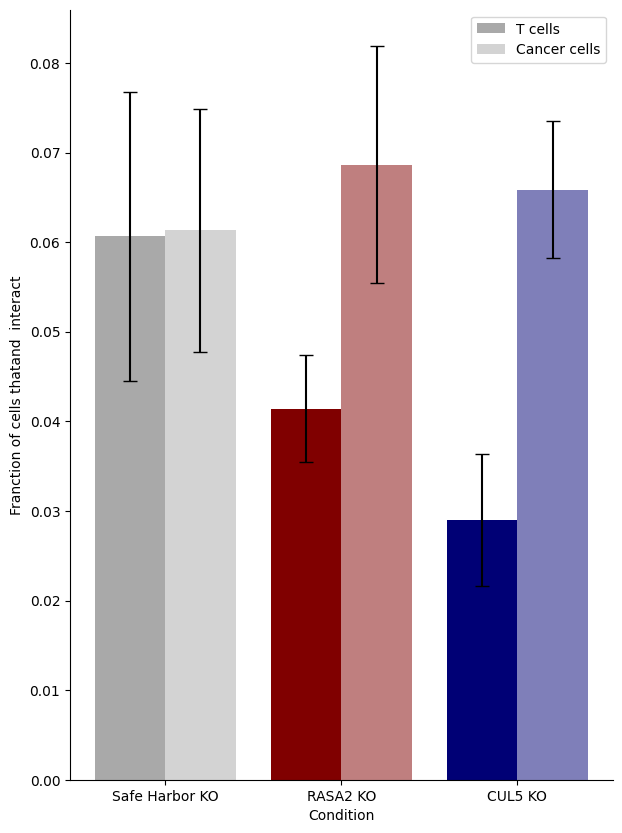

In [49]:
fig, ax = plt.subplots(1,1,figsize = (7,10))
ax.bar(np.arange(3),
       np.mean(n_ints/nt2, axis = 1),
       yerr = 1.96 * np.std(n_ints/nt2, axis = 1)/2,
       capsize = 5,
       color = [colors[i] for i in conditions], width = 0.4, label = 'T cells')

ax.bar(0.4 + np.arange(3),
       np.mean(n_ints_c/nc2, axis = 1),
       yerr = 1.96 * np.std(n_ints_c/nc2, axis = 1)/2,
       capsize = 5,
       color = [colors[i] for i in conditions], width = 0.4, alpha = 0.5, label = 'Cancer cells')

ax.set_xticks(np.arange(3) + 0.2, conditions)
ax.set_xlabel('Condition')
plt.ylabel('Franction of cells thatand  interact')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
plt.savefig('./figs/per_cell_interaction_pct.pdf', transparent = True)
plt.show()

## Get average interaction time (Figure 5)

In [52]:
import statsmodels.api as sm

In [53]:
empirical_p = [1/(np.mean(interactions[interactions['KO'] == 'Safe Harbor KO']['interaction_id_max_consec_frames'].values - 2) + 1), 
               1/(np.mean(interactions[interactions['KO'] == 'RASA2 KO']['interaction_id_max_consec_frames'].values - 2) + 1), 
               1/(np.mean(interactions[interactions['KO'] == 'CUL5 KO']['interaction_id_max_consec_frames'].values - 2) + 1)]

In [54]:
empirical_p

[0.38620689655172413, 0.2617014007516228, 0.3104575163398693]

In [55]:
4 * 1.96 * grouped['interaction_id_max_consec_frames'].std()/np.sqrt(grouped['interaction_id_max_consec_frames'].count())

KO
CUL5 KO           1.622627
RASA2 KO          1.683268
Safe Harbor KO    1.071839
Name: interaction_id_max_consec_frames, dtype: float64

In [56]:
shv = interactions[interactions['KO'] == 'Safe Harbor KO']['interaction_id_max_consec_frames'].values
rasav = interactions[interactions['KO'] == 'RASA2 KO']['interaction_id_max_consec_frames'].values
culv = interactions[interactions['KO'] == 'CUL5 KO']['interaction_id_max_consec_frames'].values

In [57]:
ttest_ind(shv, rasav)

TtestResult(statistic=-4.785318339044113, pvalue=1.8763011021268848e-06, df=1492.0)

In [58]:
ttest_ind(shv, culv)

TtestResult(statistic=-2.5880617346477064, pvalue=0.009752315736004404, df=1391.0)

In [59]:
ttest_ind(rasav, culv)

TtestResult(statistic=1.9971391512908212, pvalue=0.04599942001562371, df=1429.0)

In [61]:
4 * grouped['interaction_id_max_consec_frames'].mean()

KO
CUL5 KO           16.884211
RASA2 KO          19.284595
Safe Harbor KO    14.357143
Name: interaction_id_max_consec_frames, dtype: float64

In [62]:
markov_dwell = 8 + np.array([8.83296167, 10.19613228, 10.09121622])
empirical = [14.357143, 19.284595, 16.884211]

In [63]:
y0 = np.array([0.31169734, 0.28176689, 0.28386478])
yerr = np.array([0.00522303, 0.00500666, 0.00517178])

In [64]:
upper = 8 + 4 * (1 - (y0 + yerr))/(y0 + yerr) - markov_dwell
lower = 8 + 4 * (1 - (y0 - yerr))/(y0 - yerr) - markov_dwell

In [65]:
empirical_err = [1.071839, 1.683268, 1.622627]

In [66]:
markov_dwell

array([16.83296167, 18.19613228, 18.09121622])

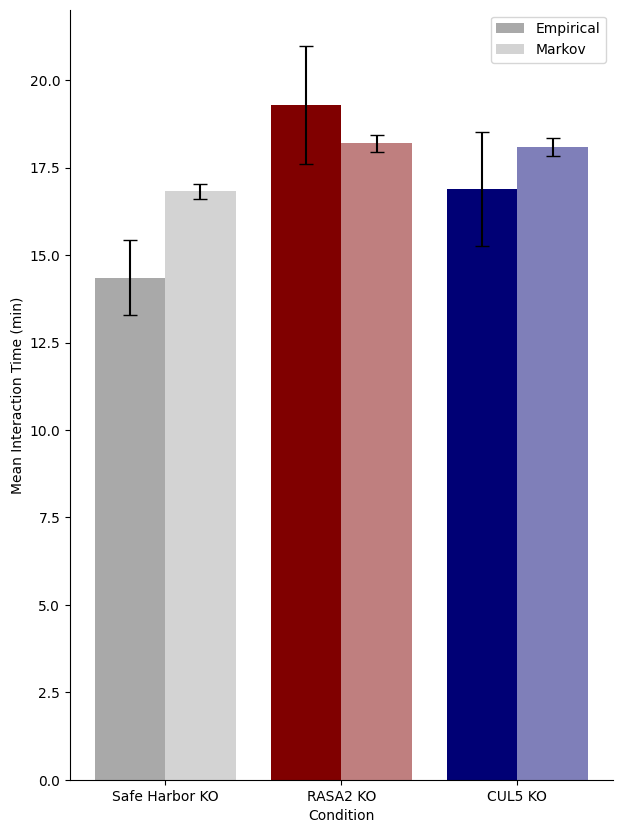

In [67]:
fig, ax = plt.subplots(1,1,figsize = (7,10))
ax.bar(np.arange(3),
       empirical,
       yerr = empirical_err,
       capsize = 5,
       color = [colors[i] for i in conditions], width = 0.4, label = 'Empirical')

ax.bar(0.4 + np.arange(3),
       markov_dwell,
       yerr = np.vstack((lower, np.abs(upper))),
       capsize = 5,
       color = [colors[i] for i in conditions], width = 0.4, alpha = 0.5, label = 'Markov')

ax.set_xticks(np.arange(3) + 0.2, conditions)
ax.set_xlabel('Condition')
plt.ylabel('Mean Interaction Time (min)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
plt.savefig('./figs/interaction_time.pdf', transparent = True)
plt.show()

In [ ]:
fig, ax = plt.subplots(1,1,figsize = (10,10))
for i in conditions:
    mask = interactions['KO'] == i
    x, y = np.unique(interactions['t_cell_id'][mask].value_counts(), return_counts = True)
    ax.bar(x,y/np.sum(y), color = colors[i], alpha = 0.5, label = i)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim([0,3])
plt.show()

In [69]:
(interactions[interactions['KO'] == 'CUL5 KO']['t_cell_id'].value_counts() >= 2).sum()/np.sum(interactions['KO'] == 'CUL5 KO')

0.045112781954887216

In [70]:
(interactions[interactions['KO'] == 'RASA2 KO']['t_cell_id'].value_counts() >= 2).sum()/np.sum(interactions['KO'] == 'Safe Harbor KO')

0.05357142857142857

In [71]:
(interactions[interactions['KO'] == 'Safe Harbor KO']['t_cell_id'].value_counts() >= 2).sum()/np.sum(interactions['KO'] == 'Safe Harbor KO')

0.08241758241758242

In [72]:
print((interactions[interactions['KO'] == 'CUL5 KO']['cancer_cell_id'].value_counts() >= 2).sum()/np.sum(interactions['KO'] == 'CUL5 KO'))
print((interactions[interactions['KO'] == 'RASA2 KO']['cancer_cell_id'].value_counts() >= 2).sum()/np.sum(interactions['KO'] == 'Safe Harbor KO'))
print(((interactions[interactions['KO'] == 'Safe Harbor KO']['cancer_cell_id'].value_counts() >= 2).sum()/np.sum(interactions['KO'] == 'Safe Harbor KO')))

0.18045112781954886
0.1936813186813187
0.14560439560439561


## Get interactions at each time point

In [92]:
n_int = np.zeros((3,350))
for i in range(len(interactions)):
    condition = well_dict[interactions['well'][i]]
    #print(condition)
    if condition == 'Safe Harbor KO':
        condition_ix = 0
    elif condition == 'RASA2 KO':
        condition_ix = 1
    else:
        condition_ix = 2
    start_ix = interactions['start_frame'][i]
    for j in range(interactions['interaction_id_max_consec_frames'][i]):
        n_int[condition_ix, start_ix + j] += 1

CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO
CUL5 KO


In [116]:
n_int2 = np.zeros((3,4,350))

for i in range(4):
    well = SH[i]
    int_sub = interactions[interactions['well'] == well]
    for j in range(len(int_sub)):
        start_ix = int_sub['start_frame'].values[j]
        for k in range(int_sub['interaction_id_max_consec_frames'].values[j]):
            n_int2[0, i, start_ix + k] += 1

    well = RASA2[i]
    int_sub = interactions[interactions['well'] == well]
    for j in range(len(int_sub)):
        start_ix = int_sub['start_frame'].values[j]
        for k in range(int_sub['interaction_id_max_consec_frames'].values[j]):
            n_int2[1, i, start_ix + k] += 1

    well = CUL5[i]
    int_sub = interactions[interactions['well'] == well]
    for j in range(len(int_sub)):
        start_ix = int_sub['start_frame'].values[j]
        for k in range(int_sub['interaction_id_max_consec_frames'].values[j]):
            n_int2[2, i, start_ix + k] += 1

In [98]:
lower_lim = 0
upper_lim = 300

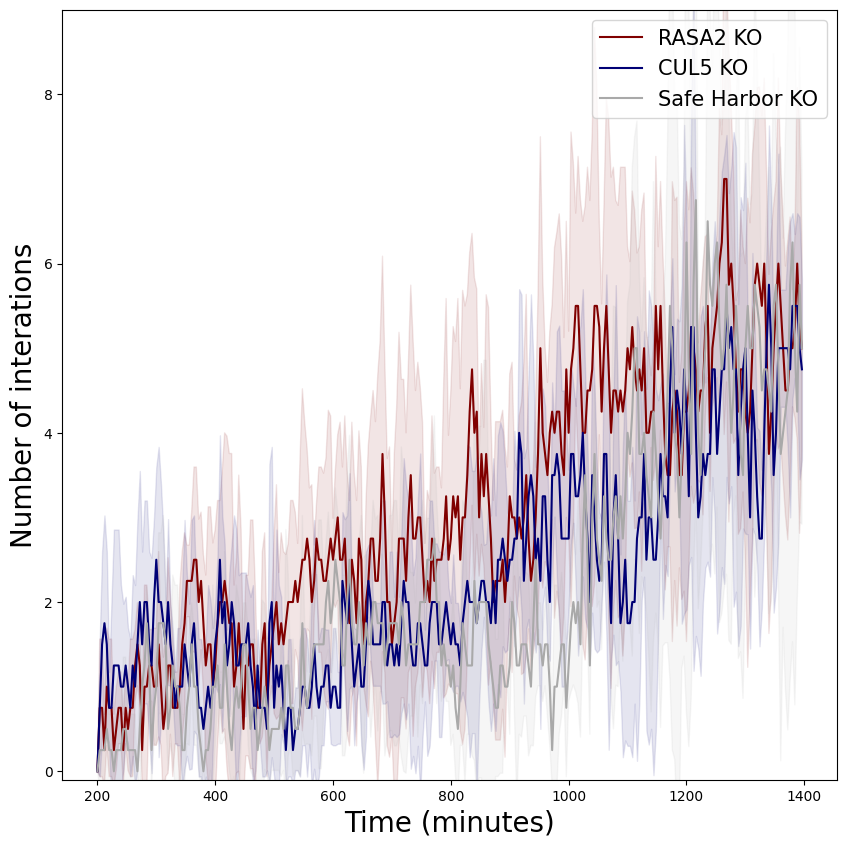

In [232]:
fig, ax = plt.subplots(1,1,figsize = (10,10))
for i in [1,2,0]:
    ax.plot(4 * np.arange(lower_lim, upper_lim) + 200, 
             np.mean(n_int2[i], axis = 0)[lower_lim:upper_lim], '-', color = colors[conditions[i]], label = conditions[i])
    ax.fill_between(4 * np.arange(lower_lim, upper_lim) + 200, 
                   np.mean(n_int2[i], axis = 0)[lower_lim:upper_lim] -  1.96 * np.std(n_int2[i], axis = 0)[lower_lim:upper_lim]/2,
                   np.mean(n_int2[i], axis = 0)[lower_lim:upper_lim] + 1.96 * np.std(n_int2[i], axis = 0)[lower_lim:upper_lim]/2,
                   color = colors[conditions[i]], alpha = 0.1)
plt.legend(fontsize = 15)
plt.xlabel('Time (minutes)', fontsize = 20)
plt.ylabel('Number of interations', fontsize = 20)
plt.ylim([-0.1,9])
#plt.xlim([50 * 3, 350 * 3])
#plt.savefig('./figs/interactions-over-time.pdf', transparent = True)
plt.show()

In [170]:
from scipy.stats import wilcoxon

In [178]:
bycondition = np.sum(n_int2[:,:,:300], axis = 1)

In [179]:
wilcoxon(bycondition[0], bycondition[1])

WilcoxonResult(statistic=3989.0, pvalue=1.9063359555957653e-31)

In [180]:
wilcoxon(bycondition[0], bycondition[2])

WilcoxonResult(statistic=13774.5, pvalue=0.0010797070424053924)

In [181]:
wilcoxon(bycondition[1], bycondition[2])

WilcoxonResult(statistic=5211.0, pvalue=9.039179342588318e-26)